<a href="https://colab.research.google.com/github/didoreus/Python_projects/blob/master/data_visualisation_day_72.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

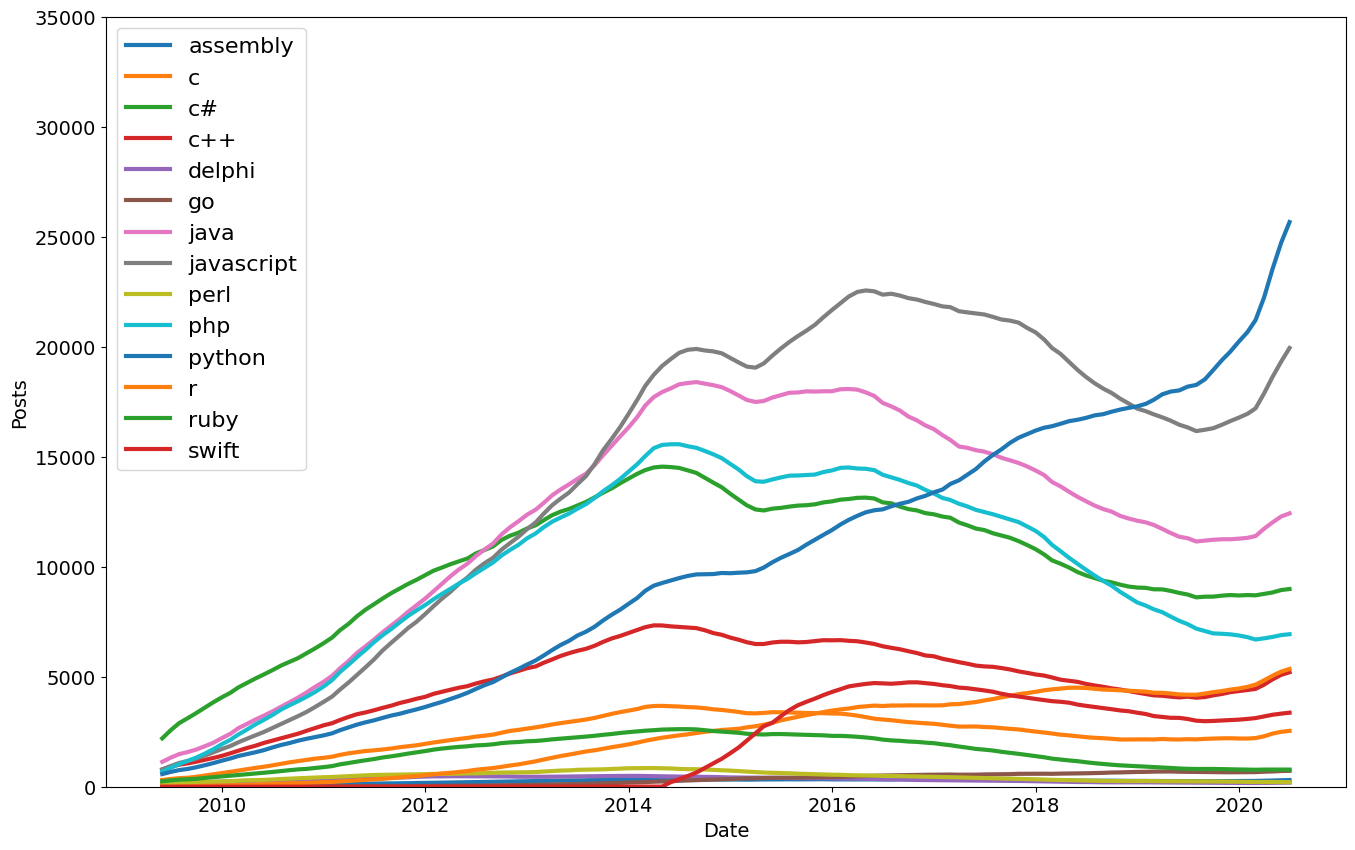

In [63]:
import pandas as pd
import matplotlib.pyplot as plt

column_name =['DATE', 'TAG', 'POSTS']
df = pd.read_csv("QueryResults.csv", names=['DATE', 'TAG', 'POSTS'], header=0)
# print(df.head(5))
# print(df.tail())
# print(df.columns)
# print(df.shape)
# print(df.count())
# group = df.groupby("TAG").sum()
# print(group)
# print(group['POSTS'].max())
# print(df.groupby("TAG").count())
df['DATE']= pd.to_datetime(df.DATE)
reshape_df = df.pivot(columns='TAG', index='DATE', values='POSTS').fillna(0)
# print(reshape_df)
# print(reshape_df.shape)
# print(reshape_df.columns)
# print(reshape_df.tail())
# print(reshape_df.count())

roll_df = reshape_df.rolling(window=12).mean()
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel(xlabel='Date', fontsize=14)
plt.ylabel(ylabel="Posts", fontsize=14)
plt.ylim(0, 35000)
# plt.plot(reshape_df.index, reshape_df.java)
# plt.plot(reshape_df.index, reshape_df.python)

for column in roll_df.columns:
    plt.plot(roll_df.index, roll_df[column], linewidth=3, label=roll_df[column].name)
plt.legend(fontsize=16)

In [ ]:
import pandas as pd
df = pd.read_csv("salaries_by_college_major.csv")
# df.head()
# df.shape
# df.columns
# df.isna()
# df.tail()
clean_df = df.dropna()
# clean_df.tail()
# clean_df['Starting Median Salary'].max()
# clean_df['Starting Median Salary'].idxmax()
# clean_df['Undergraduate Major'].loc[43]
# clean_df.loc[43]
# clean_df['Mid-Career Median Salary'].idxmax()
# clean_df['Undergraduate Major'].loc[8]
# clean_df.loc[8]
# clean_df.loc[clean_df['Starting Median Salary'].idxmin()]
# clean_df['Mid-Career 90th Percentile Salary'] - clean_df['Mid-Career 10th Percentile Salary']
# clean_df['Mid-Career 90th Percentile Salary'].subtract(clean_df['Mid-Career 10th Percentile Salary'])
spread_col = clean_df['Mid-Career 90th Percentile Salary'] - clean_df['Mid-Career 10th Percentile Salary']
clean_df.insert(1, 'Spread', spread_col)
clean_df.head()
# low_risk = clean_df.sort_values('Spread', ascending=False)
# low_risk[['Undergraduate Major', 'Spread']].head(5)
# low_risk[['Undergraduate Major', 'Spread']].max()
pd.options.display.float_format = '{:,.2f}'.format
clean_df.groupby('Group').mean()

<ipython-input-13-68848cac163c>:27: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  clean_df.groupby('Group').mean()


,Spread,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 90th Percentile Salary
Group,,,,,
Business,"103,958.33","44,633.33","75,083.33","43,566.67","147,525.00"
HASS,"95,218.18","37,186.36","62,968.18","34,145.45","129,363.64"
STEM,"101,600.00","53,862.50","90,812.50","56,025.00","157,625.00"
